# Project 1: Simulating RNA Secondary Structure

We often think of RNA in terms of its linear sequence - just a series of As, Us, Cs and Gs - on a mission to transfer information between DNA and RNA. However, unlike DNA which predictably pairs to its complementary strand in a chemically stable double helix, RNA has no such constraints, and often undergoes intra-molecular base pairing to fold and exhibit a wide range of [secondary structures](https://courses.lumenlearning.com/suny-mcc-microbiology/chapter/structure-and-function-of-rna/).

![](https://drive.google.com/uc?export=view&id=1FtOgDpKEYyOI5qFmE3I43dj6dTE72sk3)

[image reference](https://courses.lumenlearning.com/suny-mcc-microbiology/chapter/structure-and-function-of-rna/) 

It is known that functional RNAs often switch their functions by forming different secondary structures (despite having the same sequence). Popular tools for RNA secondary structures prediction, however, predict the single 'best' structures, and do not produce alternative structures or take into account the effect of different chemical environments on the energetic favouribility of alternative secondary structure.

## Probing RNA Secondary Structure ***in vivo***

If we want to computationally predict the secondar structure of RNA <i>in vivo</i>, it can be helpful if we have experimental information that allows us to constrain which nucleotides are likely paired (closed) or unpaired (open). 

We can perform such an experiment using a mutagen which is only able to induce mutations in unpaired bases. 

In these experiments, a chemical called DMS can induce mutations on A/C nucleotides which are unpaired. After sequencing and alignment to a reference genome, these mutations can be identified and used to predict which bases are paired or unpaired. This information can be input as constraints into structure prediction tools to produce better predictions of secondary structure. 

The summary of such a procedure is as follows:
<ol>
<li>Chemical Modification: RNA molecules are treated with a chemical called DMS (dimethyl sulfate). DMS reacts with specific parts of the RNA molecule, primarily with exposed adenine and cytosine bases.

<li>Reverse Transcription: The modified RNA is then converted into complementary DNA (cDNA) using a process called reverse transcription. This cDNA represents the RNA's structure, with modifications incorporated.

<li>Sequencing: The cDNA is sequenced to determine the order of the bases (A, C, G, and U) in the RNA. The sequencing identifies the positions where DMS modified the RNA.

<li>Data Analysis: Scientists analyze the sequencing data to pinpoint which RNA bases were chemically modified by DMS. This information helps them understand the RNA's structure and reactivity at a single-nucleotide resolution.
</ol>

Such experiments do not rely on thermodynamics for detecting and identifying RNA conformations, and therefore can be used on <i>in vivo</i> data to model RNA folding in the presence of cellular factors, whose energetic contributions to RNA structure are unknown. 

In this project, you will be performing the <b> data analysis </b> to help pinpoint which bases were modified, as well as design simulation experiments that will allow you to provide experimentalists with insight on how the experiments can be designed to distinguish multiple RNA secondary structures. 

### Alternative Structure Detection 

In addition to providing information to structure prediction algorithms, mutational profiling experiments such as these can also let us detect the presence of alternative structures. This is achieved by looking at patterns of co-occuring mutations. For example, if two bases in a pair are never observed to be open in the same read, they likely belong to two distinct secondary structures.


This project is based on [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7310298/) on studying RNA structural diversity.


# Important:
1. Do **not** write any `for` loops, except where specifically allowed. For loops are slow and numpy is good; so we want to perform all tasks using numpy operations.
2. The reference sequence and encoded structures are included below - do not change these, or things may not work correctly
3. Post questions to Ed! Ask questions at OH! Coding is hard so ask for help :)
4. You may work in groups of **two** or fewer. Both members in a group must submit a notebook to courseworks for grading. Fill in your partner information (if applicable) below.

**This project is due on November 9th at 10pm.**

**Group Member 1:** # YOUR INFO HERE - Name/UNI
**Group Member 2:** # YOUR INFO HERE - Name/UNI

In [ ]:
Ethan Yoder, emy2114

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
# DO NOT CHANGE
reference_sequence = np.array(['U', 'A', 'G', 'U', 'A', 'U', 'C', 'C', 'C', 'G', 'G', 'U', 'G',
       'C', 'U', 'C', 'C', 'G', 'A', 'G', 'A', 'A', 'C', 'C', 'C', 'U',
       'A', 'U', 'C', 'C', 'A', 'A', 'A', 'U', 'A', 'G', 'C', 'U', 'G',
       'U', 'U', 'A', 'A', 'A', 'A', 'G', 'A', 'C', 'C', 'U', 'C', 'U',
       'C', 'G', 'G', 'A', 'G', 'C', 'A', 'C', 'C', 'G', 'G', 'G', 'A',
       'U', 'A', 'C', 'U', 'A'])

# 0 represents a paired/closed base and 1 represents an open base

structure1 = np.array([0]*20+[1]*30+[0]*20)
structure2 = np.array([1]*70)



# 1. Convert Sequencing Reads into Mutational Information

There are two files required for this project:
1. reads.csv - contains aligned sequenced reads, where columns represent nucleotide positions in an RNA molecule and rows represent different reads ([What is a read?](https://en.wikipedia.org/wiki/Read_(biology)))
2. structure_labels.csv - contains the ground truth label of each read and its true structure. We are analysing a molecule which may take on one of two structures - a [stem and loop](https://en.wikipedia.org/wiki/Stem-loop) structure, or an unpaired linear sequence. 

**[1pt] Question 1a.** Use pandas to load the 'reads.csv' file and display the first five rows of the dataframe. Save this dataframe as `reads`. What is the first column of your dataset? Check to make sure you have loaded the index correctly.


In [4]:
path_to_data = r'/Users/ethanyoder/Downloads/'
reads = pd.read_csv(path_to_data+'reads.csv', sep=',', index_col=[0])
reads.head()

,nt1,nt2,nt3,nt4,nt5,nt6,nt7,nt8,nt9,nt10,...,nt61,nt62,nt63,nt64,nt65,nt66,nt67,nt68,nt69,nt70
0,U,G,G,U,A,U,C,C,U,G,...,C,G,G,G,A,U,A,C,U,A
1,U,A,G,U,A,U,C,C,C,G,...,C,G,G,G,A,U,A,C,U,A
2,U,A,G,U,A,U,C,C,C,G,...,C,G,G,G,A,U,A,C,U,A
3,U,A,G,U,A,U,C,C,C,G,...,C,G,G,G,A,U,A,C,U,A
4,U,A,G,U,A,U,C,C,C,G,...,C,G,G,G,A,U,A,C,U,A


In [5]:
reads['nt1']

0      U
1      U
2      U
3      U
4      U
      ..
195    U
196    U
197    U
198    U
199    U
Name: nt1, Length: 200, dtype: object

**[2pt] Question 1b.**
Compare each read to the reference sequence and see which nucleotides differ from the reference sequence. We will refer to the positions where each the nucleotide differs from the reference as a 'mutation'. Store this in a DataFrame called `mutations` where 0 corresponds to the wild-type nucleotide (not mutated) and 1 corresponds to a mutated nucleotide. Rename the columns of the `mutations` dataframe so that they are the same as in the reads.csv file.

Hint: Remember column names in a DataFrame are like a list of values, stored in df.columns. They can be accessed and reassigned using this attribute.

In [6]:
mutations = (reads.values != reference_sequence).astype(int)

mutations_df = pd.DataFrame(mutations, columns=reads.columns)

mutations_df.head()

,nt1,nt2,nt3,nt4,nt5,nt6,nt7,nt8,nt9,nt10,...,nt61,nt62,nt63,nt64,nt65,nt66,nt67,nt68,nt69,nt70
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**[2pt] Question 1c.**
What proportion of cells are mutated for each nucleotide? Plot this as a bar plot. (Hint: Try [this function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)). Set the title of this plot to 'Population average mutation rate'.

Positions which are mutated corresponds to bases in the RNA secondary sequence which are open. We can use this information to inform structure prediction algorithms to get better predictions of RNA secondary structure.

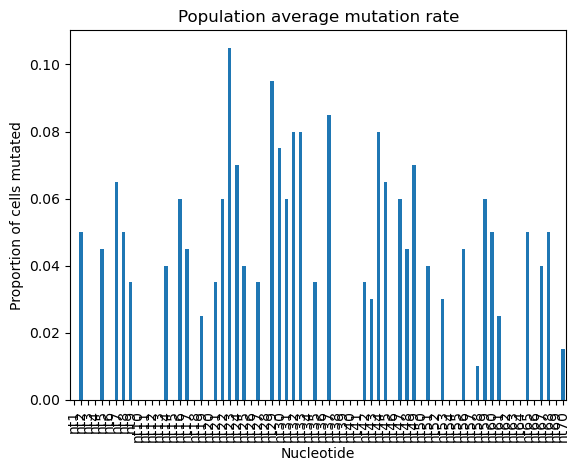

In [7]:
mutation_proportions = mutations_df.mean()

ax = mutation_proportions.plot.bar()
ax.set_title('Population average mutation rate')
ax.set_ylabel('Proportion of cells mutated')
ax.set_xlabel('Nucleotide')

plt.show()

**[1pt] Question 1d**
What is the highest mutation rate (approximately) you observe? What is the lowest? No need to write code for this - just eyeball it.

Answer:

nt23 has the highest mutation rate, it's mutated in around 11% of the cells
There are many nucleotides which aren't mutated in any of the cells, such as nt1, nt3, nt4, etc. These all
have a 0% mutation rate

# 2. Population Averages are misleading 

In this question above, we looked at all the reads together and found the average mutation rate. However, in heterogeneous populations, the average may be misleading. For example, positions which have a medium/low mutation rate may have a low mutation rate by chance/as a function of chemical environment in the cell, or they may be high in one subpopulation and low in another. In the next problem, we will explore how alternative structures may be hidden in population averages

**[0pt] Question 2a** Use pandas to load the 'structure_labels.csv' file and display the first five rows of the dataframe. Save this dataframe as structure_labels.


In [8]:
path_to_data = r'/Users/ethanyoder/Downloads/'
structure_labels = pd.read_csv(path_to_data+'structure_labels.csv', sep=',', index_col=[0])
structure_labels.head()

,Structure
0,Unfolded
1,StemLoop
2,Unfolded
3,Unfolded
4,StemLoop


**[2pt] Question 2b.** Merge the structure labels dataframe with the reads dataframe so that we may label each read with its structure. Overwrite the original `reads` variable with this merged DataFrame. Display the first five rows of the merged dataframe.

In [9]:
merged_reads = pd.merge(reads, structure_labels, left_index=True, right_index=True)

reads = merged_reads

reads.head()

,nt1,nt2,nt3,nt4,nt5,nt6,nt7,nt8,nt9,nt10,...,nt62,nt63,nt64,nt65,nt66,nt67,nt68,nt69,nt70,Structure
0,U,G,G,U,A,U,C,C,U,G,...,G,G,G,A,U,A,C,U,A,Unfolded
1,U,A,G,U,A,U,C,C,C,G,...,G,G,G,A,U,A,C,U,A,StemLoop
2,U,A,G,U,A,U,C,C,C,G,...,G,G,G,A,U,A,C,U,A,Unfolded
3,U,A,G,U,A,U,C,C,C,G,...,G,G,G,A,U,A,C,U,A,Unfolded
4,U,A,G,U,A,U,C,C,C,G,...,G,G,G,A,U,A,C,U,A,StemLoop


**[3pt] Question 2c.** Write a function which performs the following steps:
1. Select the reads that have a specified structure according to the 'Structure' column and save them in another dataframe. Again, compare each read to the reference sequence and see which nucleotides differ from the reference sequence. We will refer to the positions where each the nucleotide differs from the reference as a 'mutation'. Store this in a DataFrame called `mutations` where 0 corresponds to the wild-type nucleotide (not mutated) and 1 corresponds to a mutated nucleotide. Ensure the columns of the `mutations` dataframe are the same as in the reads.csv file (remove the column 'Structure' from the mutations DataFrame if it is present; this information is now redundant since we have only retained reads of one structure type.
2. What proportion of cells corresponding to the specified structure are mutated for each nucleotide? Plot this as a bar plot. (Hint: Try [this function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)). The title of this plot should be a user-specified parameter, with default 'Average Mutations per Nucleotide' and the shape of this figure should be 10 (width) by 5 (height).


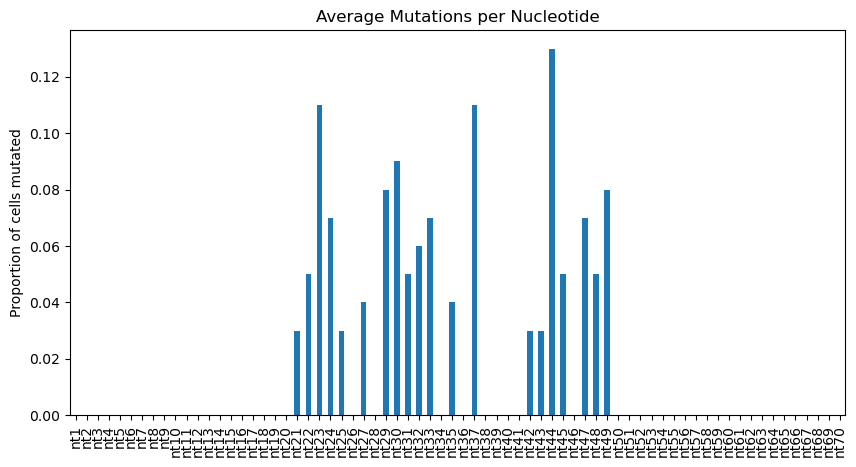

In [12]:
def display_substructure(reads, structure_name, reference_sequence, title='Average Mutations per Nucleotide'):
    
    specified_structure_reads = reads[reads['Structure'] == structure_name]
    
    specified_structure_reads = specified_structure_reads.drop(['Structure'], axis=1)
        
    nucleotide_positions = specified_structure_reads.columns[:len(reference_sequence)]
    specified_structure_reads = specified_structure_reads[nucleotide_positions]
    
    mutations = np.not_equal(specified_structure_reads.values, reference_sequence).astype(int)
    
    mutations_df = pd.DataFrame(mutations, columns=nucleotide_positions, index=specified_structure_reads.index)
    
    mutation_proportions = mutations_df.mean()
    
    plt.figure(figsize=(10, 5))
    ax = mutation_proportions.plot.bar()
    ax.set_title(title)
    ax.set_ylabel('Proportion of cells mutated')
    
    plt.show()

display_substructure(reads, 'StemLoop', reference_sequence)

**[1pt] Question 2d-(i).**
Use the function you wrote in 2c to display the average mutations relevant to the 'StemLoop' structure. Title your plot 'Structure 1 Mutations per Nucleotide'

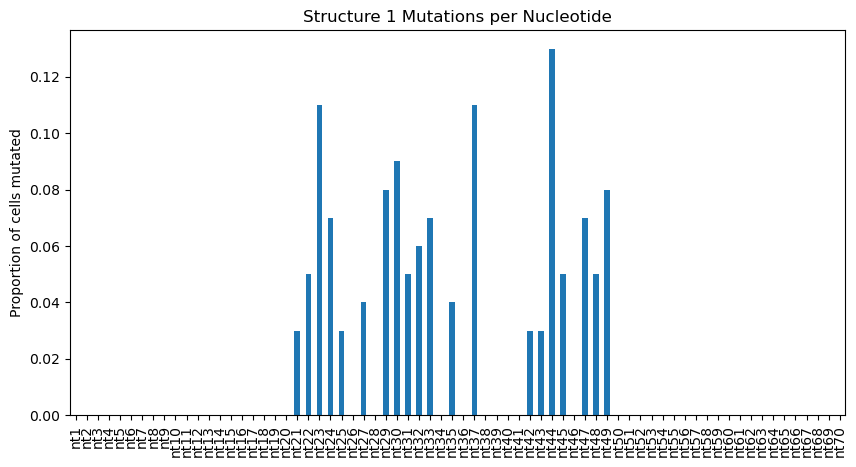

In [13]:
display_substructure(reads, 'StemLoop', reference_sequence, title='Structure 1 Mutations per Nucleotide')

**[1pt] Question 2d-(ii).**
Use the function you wrote in 2c to display the average mutations relevant to the 'Unfolded' structure. Title your plot 'Structure 1 Mutations per Nucleotide'

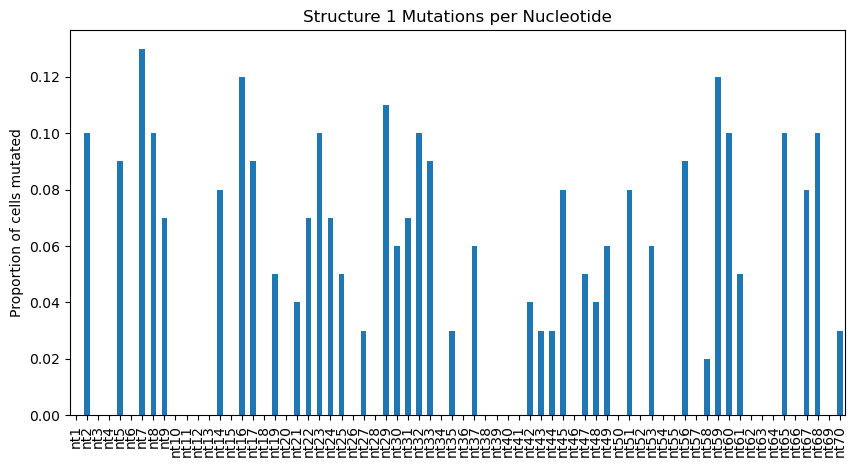

In [14]:
display_substructure(reads, 'Unfolded', reference_sequence, title='Structure 1 Mutations per Nucleotide')

**[1pt] Question 2e.** What differences do you observe between the mutation rate bar plots for each structure? How is this information lost in the population average?

***Answer:*** Unfolded structures have a much more even distribution of mutated nucleotides, while stemloops generally only experience mutations in a set of ~20 nucleotides in the middle of the strand. When we just take
the overall avergae, we lose this information, so we wouldn't be able to tell that structure has any influence
on mutation proportion.

# 3. Simulating DMS Mutations based on sequence structure

Before performing an experiment, we can use compute simulations to help us determine certain experimental parameters. In this example, we will simulate RNA structure probing via DMS mutations using the following steps. Each open/unpaired A or C nucleotide is mutated according to some probability ```DMS_mutation_prob``` (default 0.1).

1. For a given structure, identify the bases which are eligible for DMS mutation (must be both unpaired and either an 'A' nucleotide or 'C' nucleotide).

    ```eligibility_mask(sequence, structure)```

2. Simulate the DMS mutation process on one read using ```np.random.random``` to generate randomness according to a uniform distribution. 

    ```single_read_random_DMS_mutation_mask(eligible_to_mutate, DMS_mutation_prob)```

3. Adapt your function from part (2) to simulate the DMS mutation process on multiple reads simultaneously

    ```multiple_reads_random_DMS_mutation_mask(eligible_to_mutate, DMS_mutation_prob, number_of_reads)```

4. At each simulated position to mutate, introduce a random mutation in the sequence uniformly from the four bases (A,U,C,G). Note that a base might be mutated back into itself.

Answer each of the questions below.

In [15]:
DMS_mutation_prob = 0.1

**[2pt] Question 3a.**
Write a function which, for a given sequence and structure, identifies the bases which are eligible for DMS mutation (must be both unpaired and either an 'A' nucleotide or 'C' nucleotide).


In [16]:
def eligibility_mask(sequence, structure):
    """
    Generate a Boolean mask (of the same shape as input parameters sequence and structure) which contains 
    False at positions which are ineligible and True at positions which are eligible for DMS mutations. 
    To be eligible, a position must be both unpaired and be an 'A' or 'C' nucleotide.
    
    @param sequence: np.array containing bases A,U,C,G representing the linear nucleotide sequence of the RNA molecule
    @param structure: np.array containing a 1 at positions which are unpaired and 0 at positions which are paired in the RNA secondary structure
    
    @return mask - np.array containing Boolean values (True at eligible positions, False elsewhere)
    """    
    assert sequence.shape == structure.shape
    

    unpaired_mask = (structure == 1)
    
    ac_mask = (sequence == 'A') | (sequence == 'C')
    
    mask = unpaired_mask & ac_mask
    
    assert mask.shape == sequence.shape, 'Mask must have the same shape as the input sequence'
    return mask

    
eligible_to_mutate = eligibility_mask(reference_sequence, structure1.astype(bool))

In [17]:
# Check that this is a Boolean mask as we expect
eligible_to_mutate

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [18]:
# Check that only A or C is eligible to mutate
reference_sequence[eligible_to_mutate]

array(['A', 'A', 'C', 'C', 'C', 'A', 'C', 'C', 'A', 'A', 'A', 'A', 'C',
       'A', 'A', 'A', 'A', 'A', 'C', 'C'], dtype='<U1')

In [19]:
# Check that only open positions are eligible to mutate
structure1[eligible_to_mutate]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**[1pt] Question 3b**
Write a function which simulates the DMS mutation process on one read using ```np.random.random``` to generate randomness according to a uniform distribution. Recall, with probability `DMS_mutation_prob` and eligible base acquires a DMS mutation.


In [20]:
def single_read_random_DMS_mutation_mask(eligible_to_mutate, DMS_mutation_prob):
    """
    Generate a Boolean mask (of the same shape as input parameter eligible_to_mutate) which simulates 
    positions mutated in a DMS experiment on a single read.
    
    A position in a sequencing read is mutated with probability DMS_mutation_prob if it is eligible to
    mutate.
    
    Hint: Use np.random.random() to generate random values. 
    
    @param: eligible_to_mutate - (np.array) containing Boolean values - True at mutation eligible positions, False elsewhere
    @param: DMS_mutation_prob - (float) which specifies the probability of DMS inducing a mutation at a position,
                                given that the position is eligible.
    @return: mutation_profile - np.array containing Boolean values - True at positions where a mutation WAS simulated, False elsewhere.
    """
       
    random_values = np.random.random(size=eligible_to_mutate.shape)
    
    mutation_profile = (random_values < DMS_mutation_prob) & eligible_to_mutate

    return mutation_profile

In [21]:
single_read_random_DMS_mutation_mask(eligible_to_mutate, DMS_mutation_prob)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

**[2pt] Question 3c**
Write a function which simulates the DMS mutation process on `number_of_reads` reads. Hint! We can  make use of numpy operations to simulate DMS mutations on many reads simultaneously - see [np.repeat](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html). Pay attention to the shape of the array and axis you are repeating along. You may need to reshape your array in order for this function to be applied.

Figure out what array you need, and then apply the function you wrote in **3b** above.

(Try testing it out with a small array and verbally inspecting to ensure you end up with the correct repetition pattern.)

In [22]:
def multiple_reads_random_DMS_mutation_mask(eligible_to_mutate, DMS_mutation_prob, number_of_reads):
    """
    Generate a Boolean mask (of the same shape as input parameter eligible_to_mutate) which simulates 
    positions mutated in a DMS experiment on multiple reads.
    
    Hint! We can use the function single_read_random_DMS_mutation_mask along with a for loop to generate
    multiple values, or we can make use of numpy operations to simulate DMS mutations on many reads 
    simultaneously - see https://numpy.org/doc/stable/reference/generated/numpy.repeat.html
    
    Caution! Make sure each read is independently simulated, and we don't end up with number_of_reads copies
    of the exast same mutation profile for each read.
    
    Ensure that the array you return is of shape number_of_reads x len(sequence)! 
    
    TODO 
    @param: eligible_to_mutate - (np.array) containing Boolean values - True at mutation eligible positions, False elsewhere
    @param: DMS_mutation_prob - (float) which specifies the probability of DMS inducing a mutation at a position,
                                given that the position is eligible.
    @return: mutation_profiles - np.array (len_sequence x number_of_reads) containing Boolean values - True at positions where a mutation WAS simulated, False elsewhere.
    """
   
    repeated_eligible = np.repeat(eligible_to_mutate[np.newaxis, :], number_of_reads, axis=0)
    
    random_values = np.random.random(size=repeated_eligible.shape)
    
    mutation_profiles = (random_values < DMS_mutation_prob) & repeated_eligible
    
    return mutation_profiles

multiple_reads_random_DMS_mutation_mask(eligible_to_mutate, DMS_mutation_prob, 3)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, Fals

In [23]:
number_of_reads = 100 

mutated_positions = multiple_reads_random_DMS_mutation_mask(eligible_to_mutate, DMS_mutation_prob, number_of_reads)

assert mutated_positions.shape == (number_of_reads,len(reference_sequence)), 'Ensure that the array you return is of shape number_of_reads x len(sequence)! '

mutated_positions.shape

(100, 70)

In [25]:
# Check that only A and C is mutated:

for i in range(number_of_reads):
    assert not np.isin(reference_sequence[mutated_positions[i]], ['U','G']).any()

In [26]:
# Check that only eligible sites are mutated:
for i in range(number_of_reads):
    assert (eligible_to_mutate[mutated_positions[i]]).all()

**[3pt] Question 3d**
Write a function to introduce a random mutation in the sequence at mutation positions, uniformly from the four bases (A,U,C,G). Note that a base might be mutated back into itself. Make use of `np.random.choice` and the Boolean masks you have written in 3a-c!

In [33]:
def introduce_mutations_in_sequence(sequence, mutated_positions):
    """
    We want to simulate sequences (of A,U,C,G) which match the reference EXCEPT
    at positions which we have simulated as mutations
    :param sequence: reference sequence containing the wild-type/un-mutated sequenced
    :param mutated_positions: np.array Boolean array of shape number_of_reads x len(reference_sequence)
                              containing True at positions we simulated to be mutated and False elsewhere
    :return: np.array of strings containing simulated reads.
    """

    num_positions = sequence.shape[0]
    
    num_reads = mutated_positions.shape[0]
    
    bases = np.array(['A', 'U', 'C', 'G'])
    
    simulated_reads = np.tile(sequence, (num_reads, 1))
    
    random_bases = np.random.choice(bases, size=(num_reads, num_positions))
    
    same_as_original = (random_bases == simulated_reads)
    
    while same_as_original.any():

        new_bases = np.random.choice(bases, size=same_as_original.sum())

        random_bases[same_as_original] = new_bases

        same_as_original = random_bases == simulated_reads
    
    simulated_reads[mutated_positions] = random_bases[mutated_positions]

    return simulated_reads

In [32]:
introduce_mutations_in_sequence(reference_sequence,mutated_positions)

array([['U', 'A', 'G', ..., 'C', 'U', 'A'],
       ['U', 'A', 'G', ..., 'C', 'U', 'A'],
       ['U', 'A', 'G', ..., 'C', 'U', 'A'],
       ...,
       ['U', 'A', 'G', ..., 'C', 'U', 'A'],
       ['U', 'A', 'G', ..., 'C', 'U', 'A'],
       ['U', 'A', 'G', ..., 'C', 'U', 'A']], dtype='<U1')

**Putting it all together:** We combine all the functions you wrote in the question above to create a simulation of a RNA structure probing experiment. 

In [34]:
def simulate_experiment(sequence, structure_list, DMS_mutation_prob, number_of_reads):
    
    all_dfs = []
    for i, structure in enumerate(structure_list):
        eligible_to_mutate = eligibility_mask(sequence, structure.astype(bool))
        mutated_positions = multiple_reads_random_DMS_mutation_mask(eligible_to_mutate,
                                                                    DMS_mutation_prob, number_of_reads)
        mutated_sequence = introduce_mutations_in_sequence(sequence, mutated_positions)

        df = pd.DataFrame(mutated_sequence)
        plt.figure()
        sns.heatmap(df.values == sequence, cmap='viridis')
        plt.title(f'Mutated positions in structure {i+1}')
        plt.show()
        plt.close()
        
        df['Structure'] = f'Structure {i+1}'
        
        all_dfs.append(df)
    return pd.concat(all_dfs).reset_index(drop=True)
    

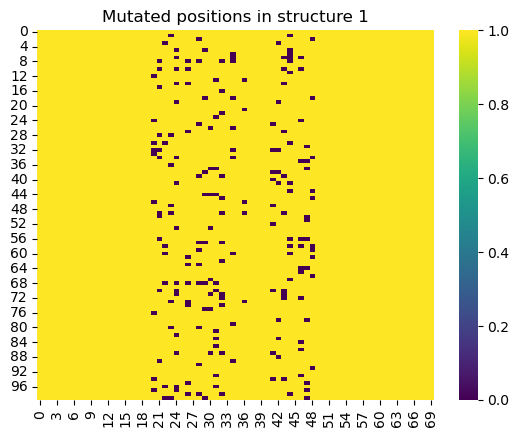

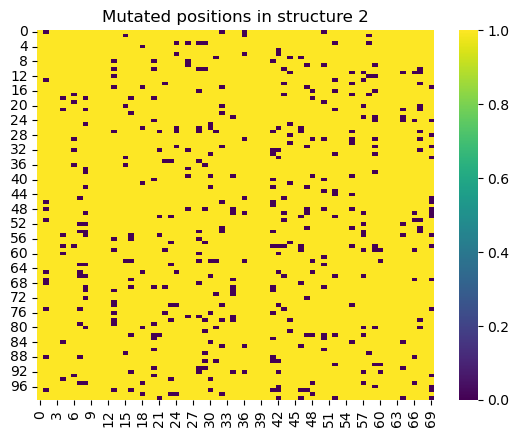

In [35]:
df = simulate_experiment(reference_sequence, [structure1, structure2], DMS_mutation_prob, number_of_reads)

# 4. Detecting alternative structures.

In Question 1, we saw how population averages might obscure heterogenous/alternative structures. We can use machine learning approaches to cluster mutation profiles to determine if we can automatically detect alternative structures. We have provided a function `show_alternative_structures()` to visualize in 2D the structure how these mutation profiles cluster. Try running it in the cells below!

In [36]:
def show_alternative_structures(df):
    mutation_profiles = (df.drop(['Structure'], axis=1).values!=reference_sequence).astype(int)

    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA

    X_embedded = PCA(n_components=2).fit_transform(mutation_profiles)
    X_embedded = pd.DataFrame(X_embedded)
    X_embedded = X_embedded.join(df['Structure'])

    sns.scatterplot(data=X_embedded, x=0, y=1, hue='Structure')



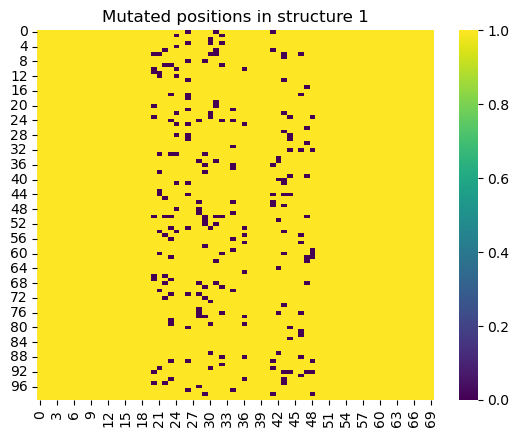

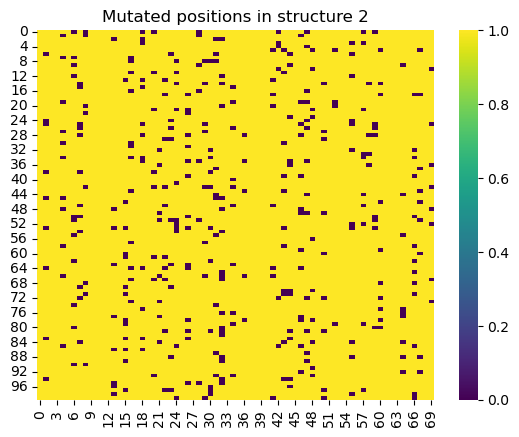

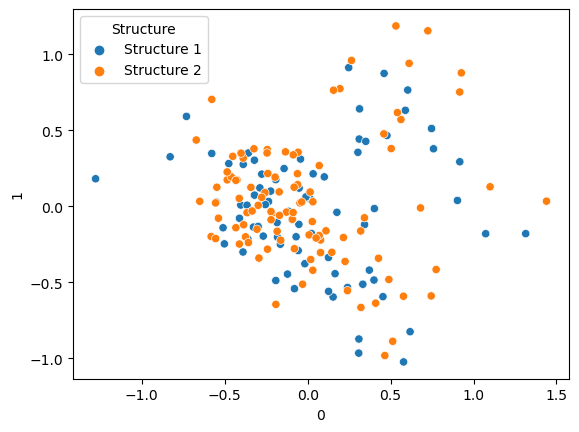

In [37]:
df = simulate_experiment(reference_sequence, [structure1, structure2], DMS_mutation_prob=0.1, number_of_reads=100)
show_alternative_structures(df)

You might be able to see that if we didn't know the structure identity beforehand, it would be very difficult to distinguish the two structures from this plot. This is because there is not enough signal differentiating each structure from another. In order to tell the two structures apart, we need more signal. Therefore, we need the DMS mutation probability to be higher, in order to generate more mutations which distinguish the structures.

**[2pt] Question 4a**

Run the above code for different values of `DMS_mutation_prob`. At what probability are we clearly able to identify the presence of two alternative structures? (You may use a for loop here)

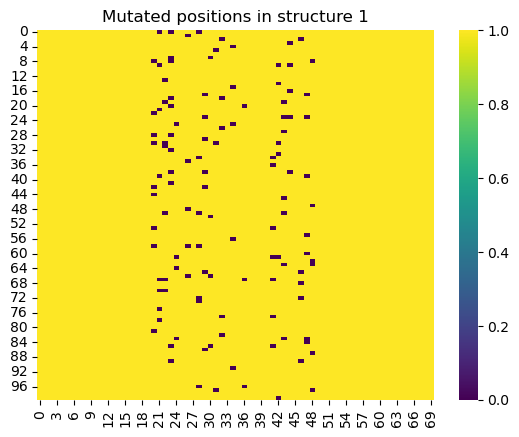

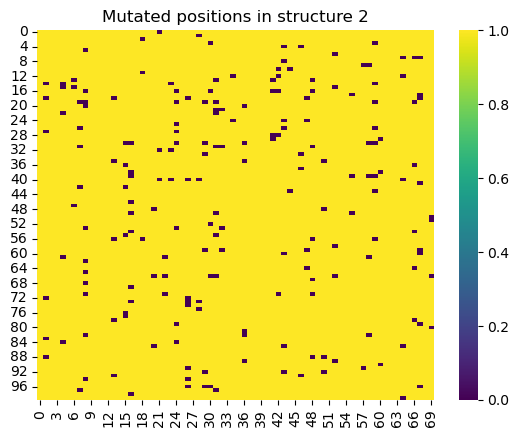

Visualization for DMS Mutation Probability: 0.05


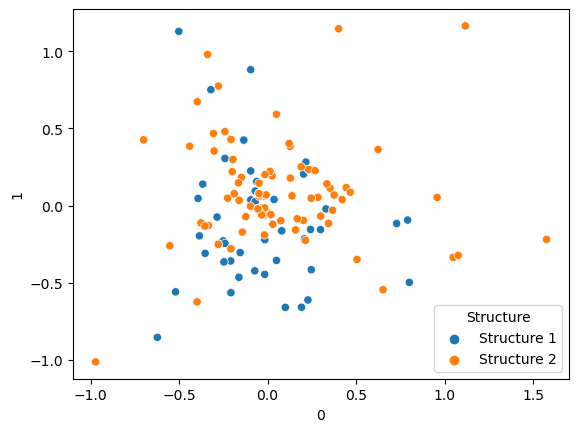

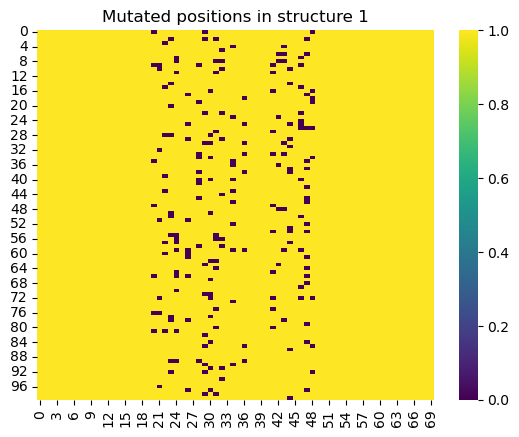

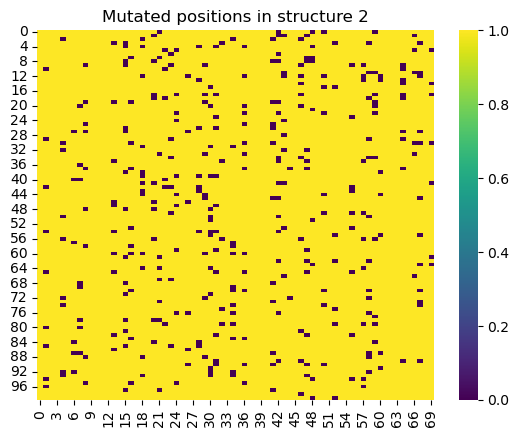

Visualization for DMS Mutation Probability: 0.1


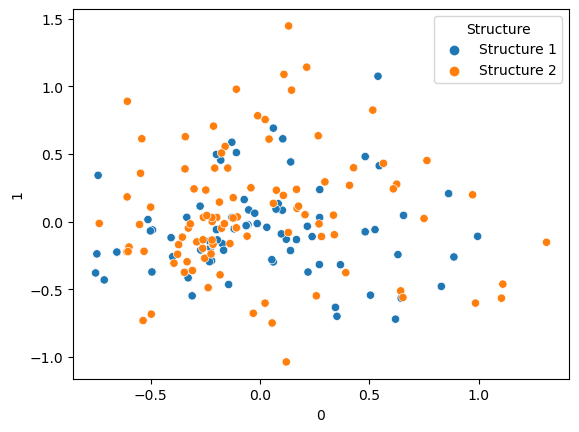

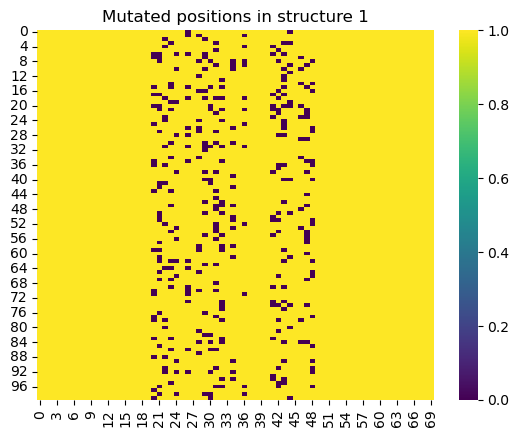

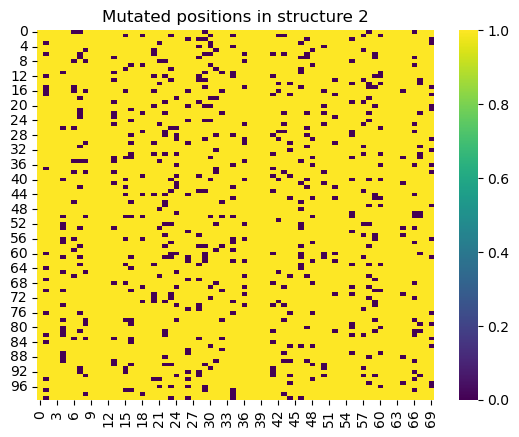

Visualization for DMS Mutation Probability: 0.15000000000000002


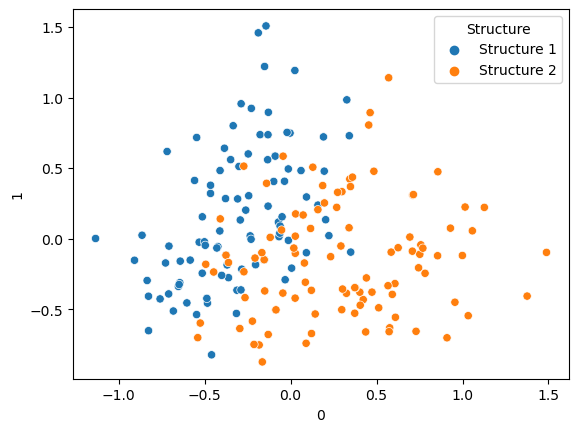

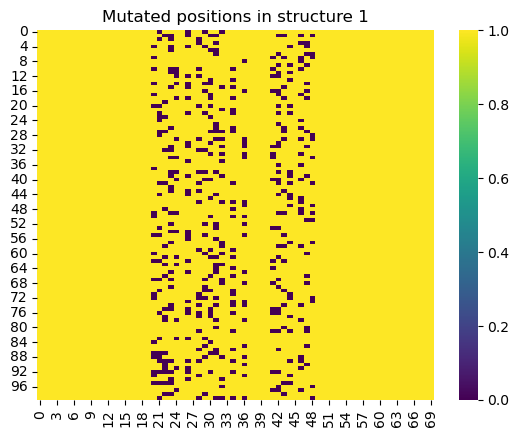

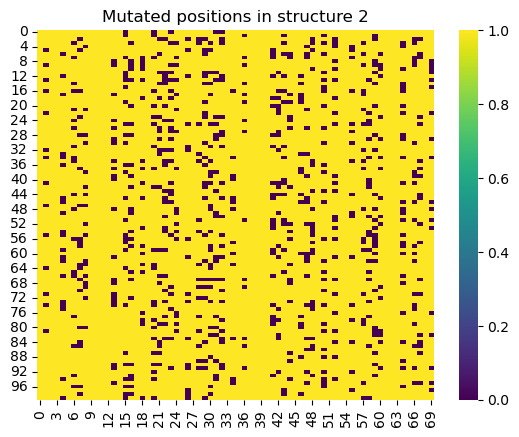

Visualization for DMS Mutation Probability: 0.2


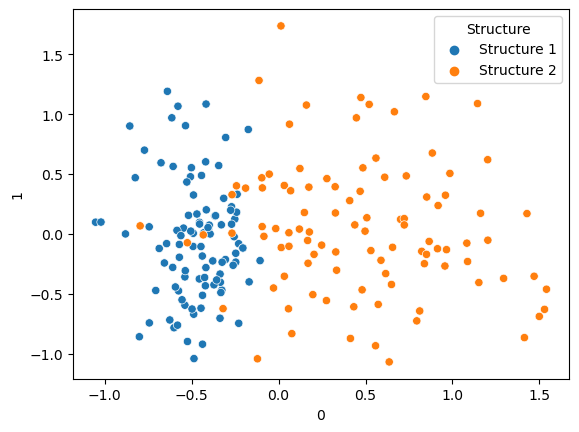

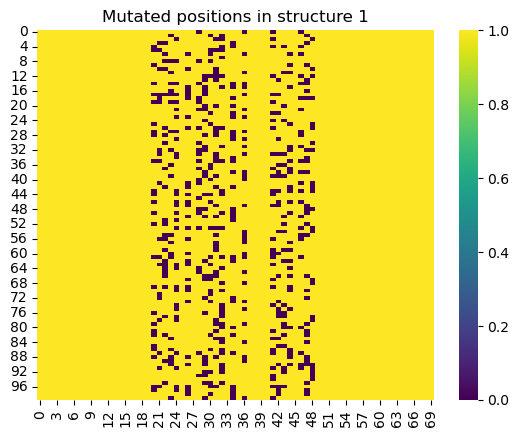

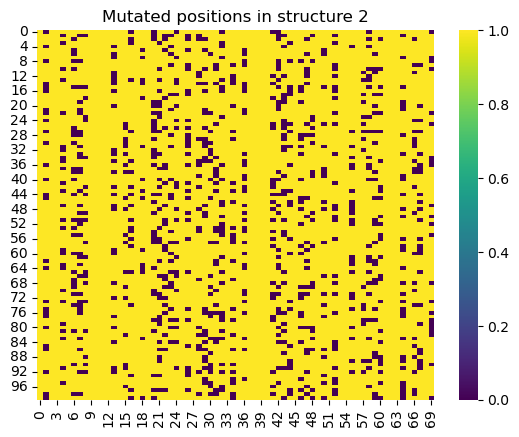

Visualization for DMS Mutation Probability: 0.25


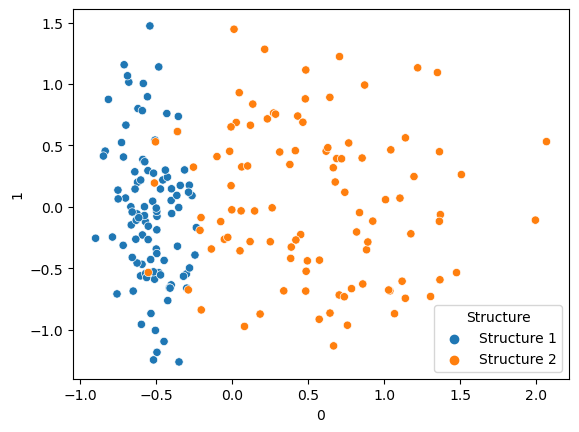

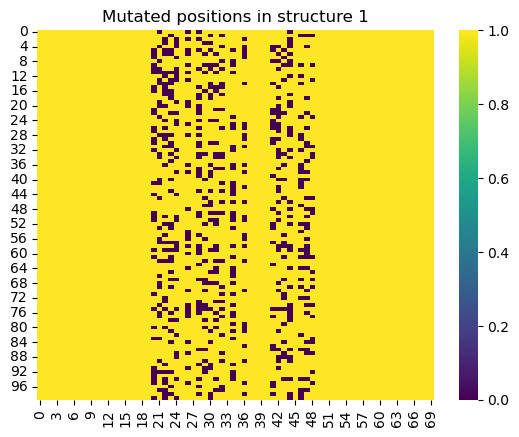

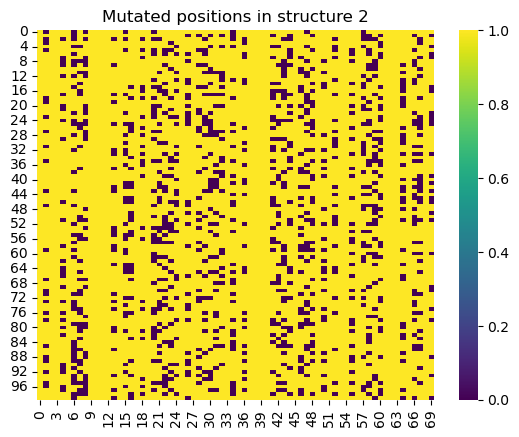

Visualization for DMS Mutation Probability: 0.3


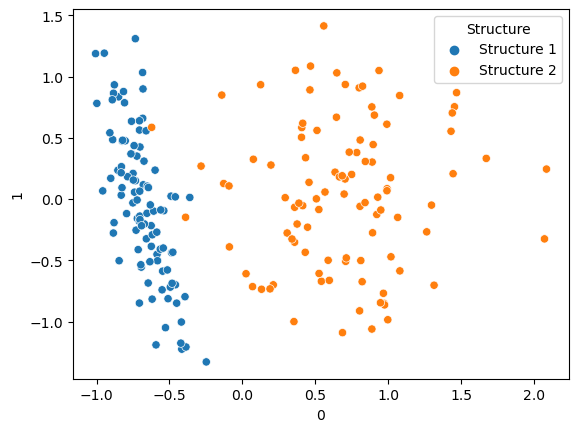

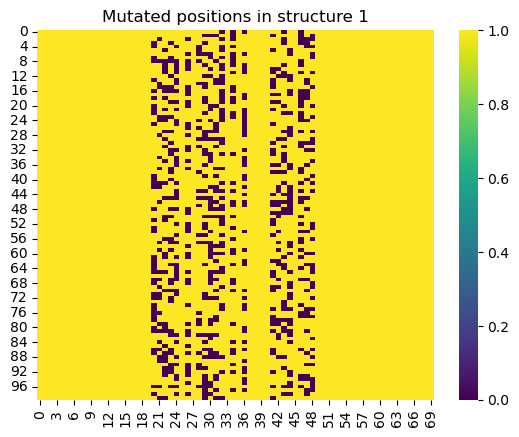

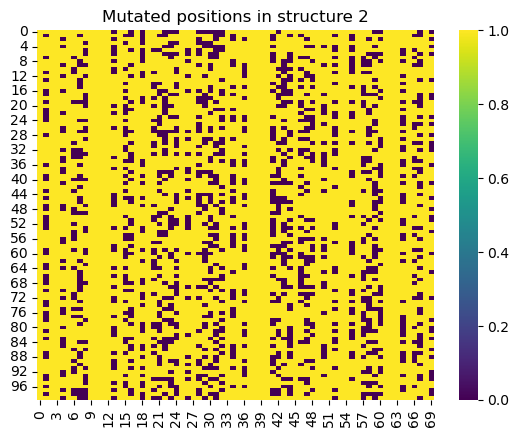

Visualization for DMS Mutation Probability: 0.35000000000000003


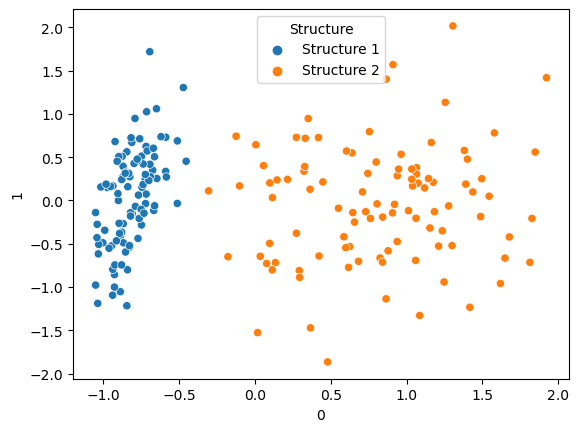

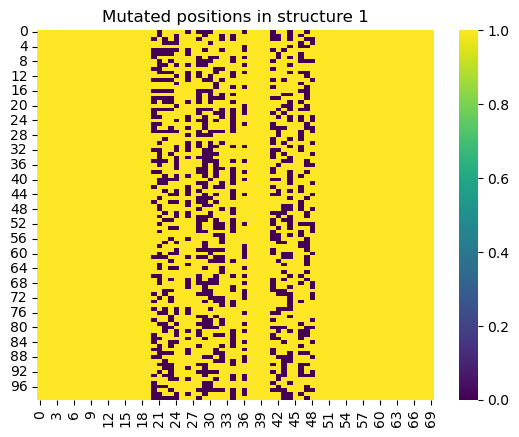

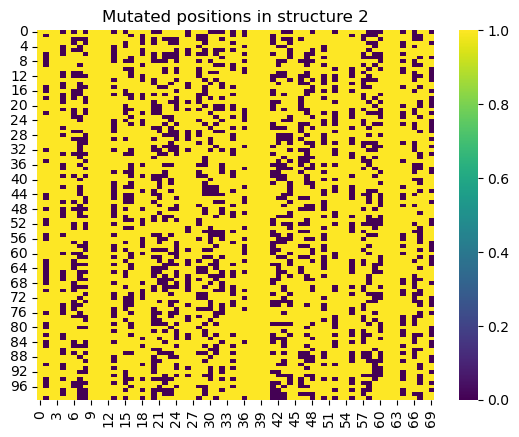

Visualization for DMS Mutation Probability: 0.4


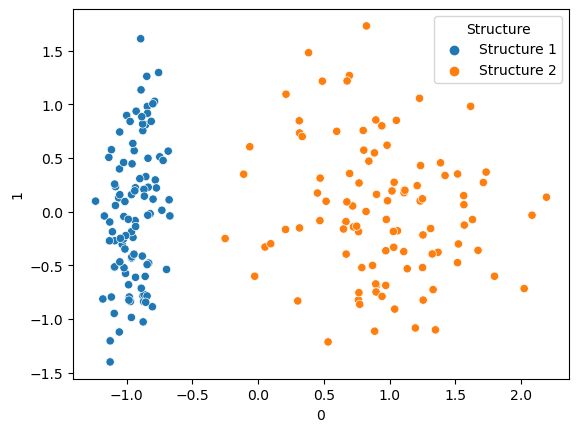

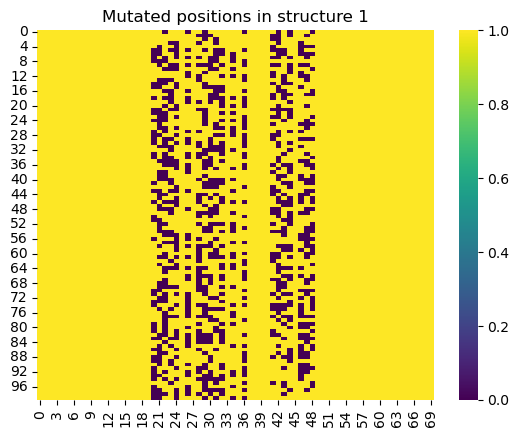

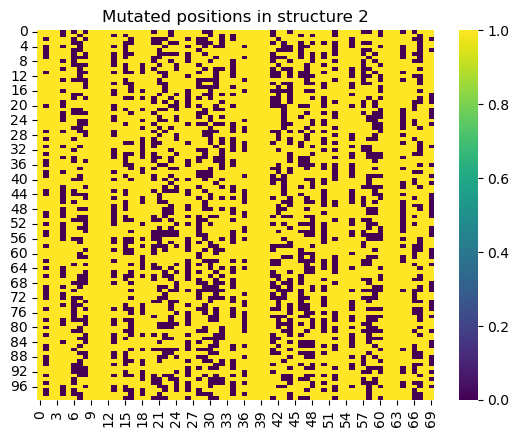

Visualization for DMS Mutation Probability: 0.45


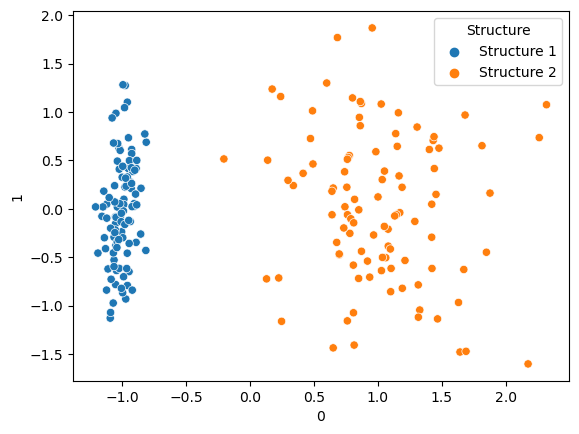

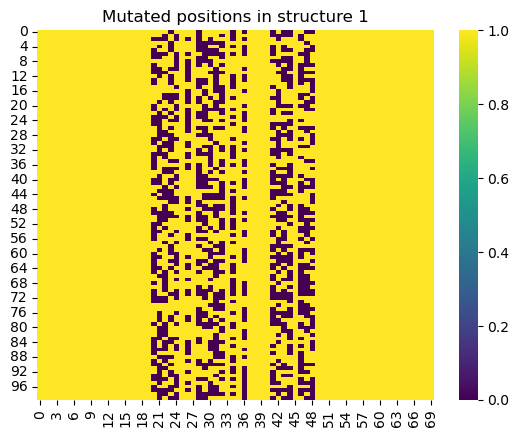

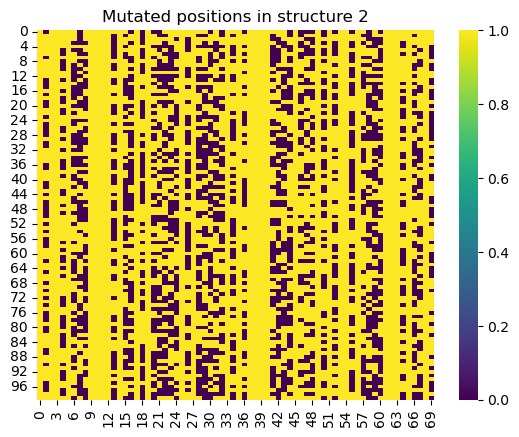

Visualization for DMS Mutation Probability: 0.5


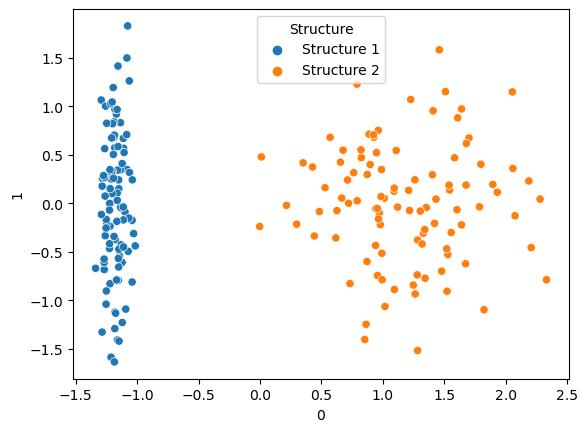

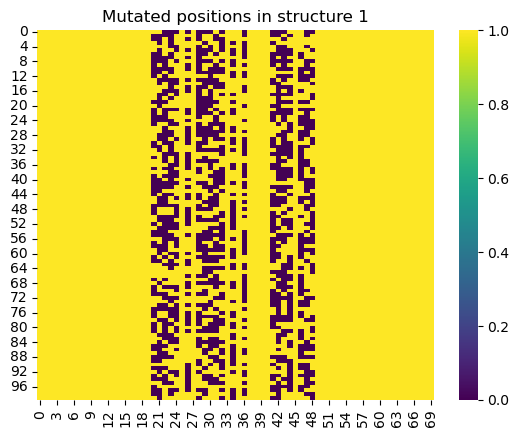

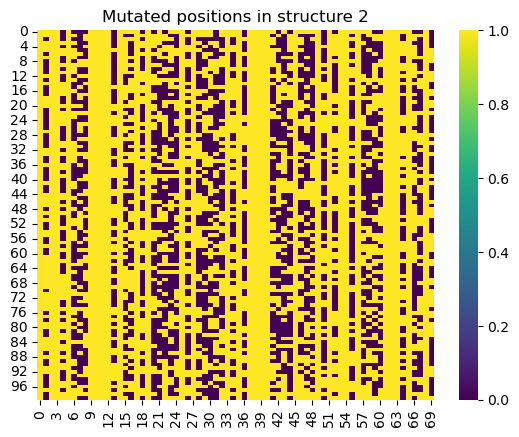

Visualization for DMS Mutation Probability: 0.55


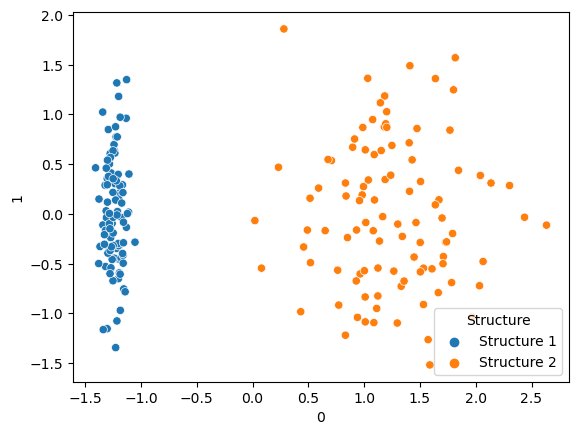

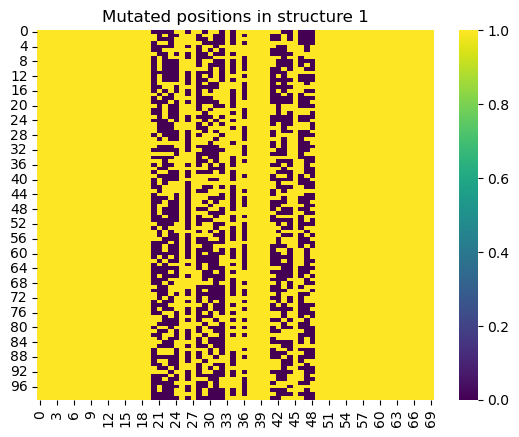

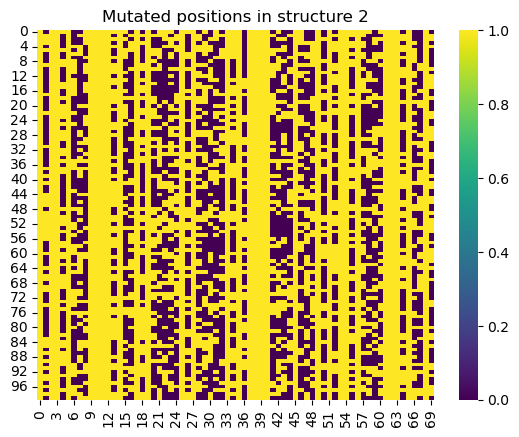

Visualization for DMS Mutation Probability: 0.6000000000000001


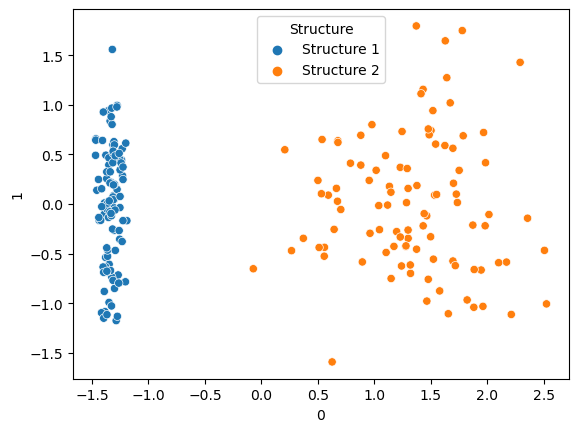

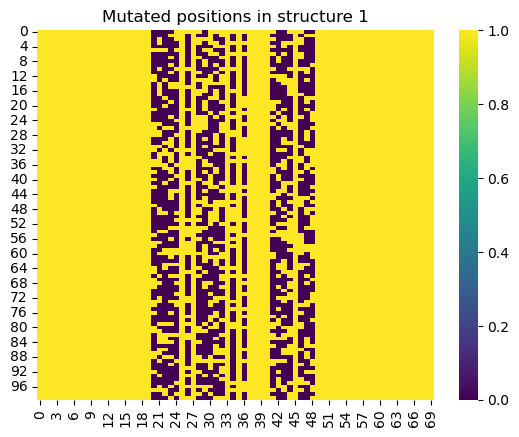

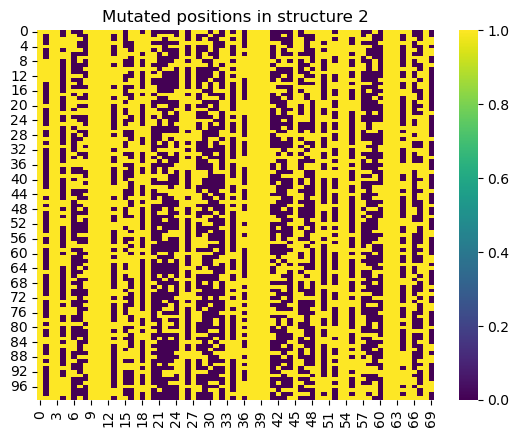

Visualization for DMS Mutation Probability: 0.6500000000000001


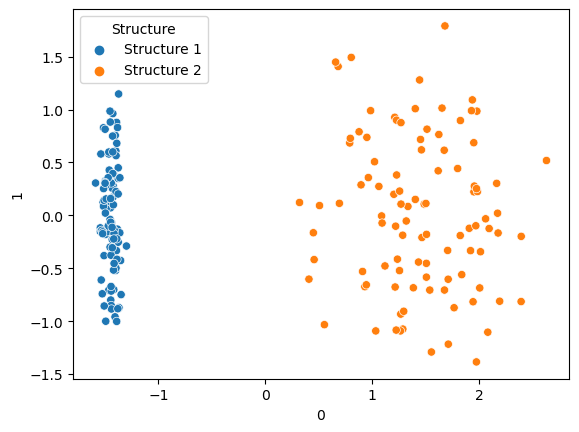

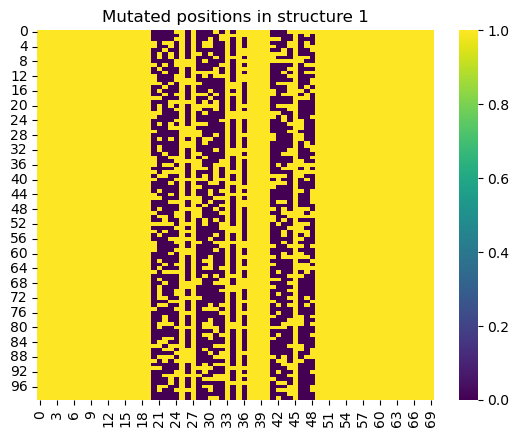

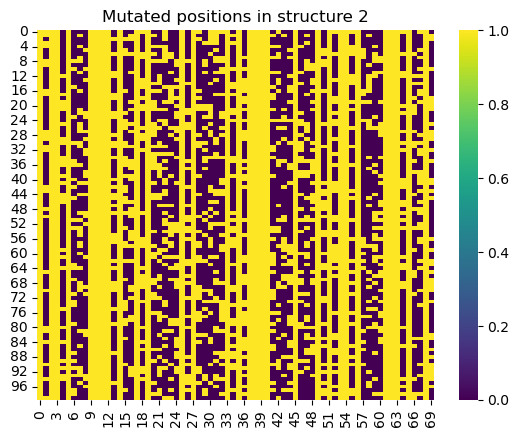

Visualization for DMS Mutation Probability: 0.7000000000000001


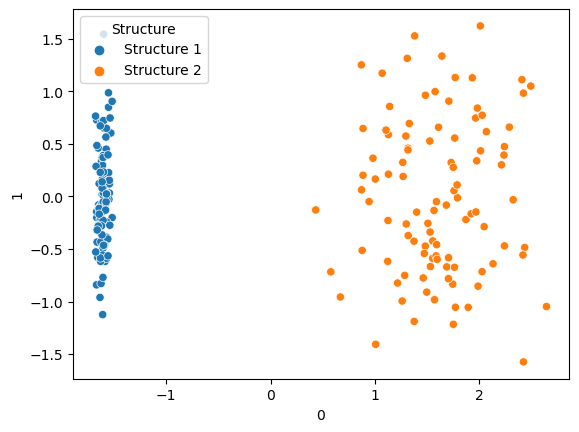

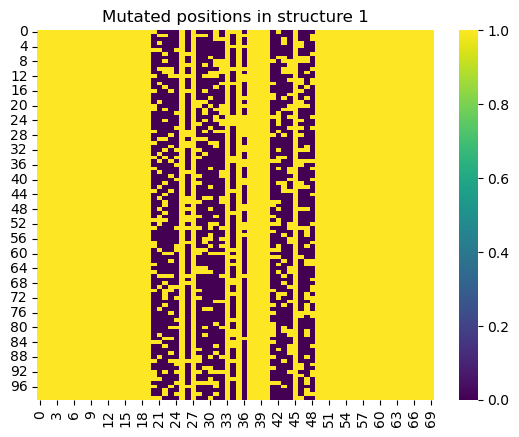

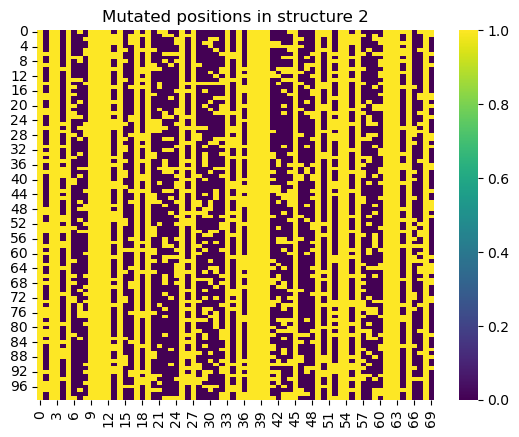

Visualization for DMS Mutation Probability: 0.7500000000000001


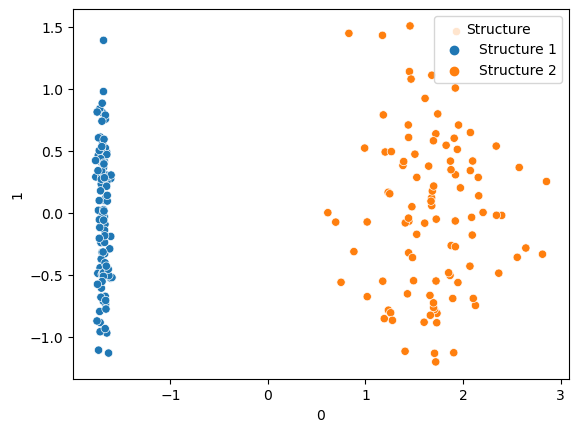

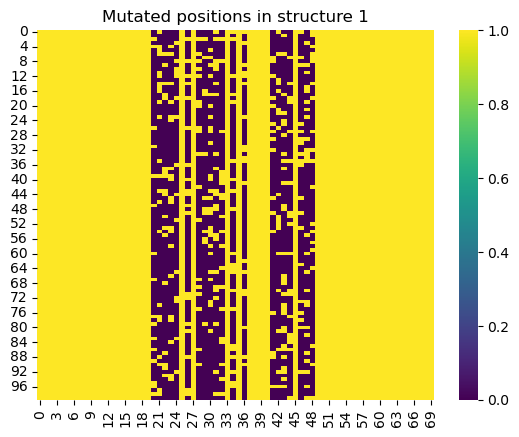

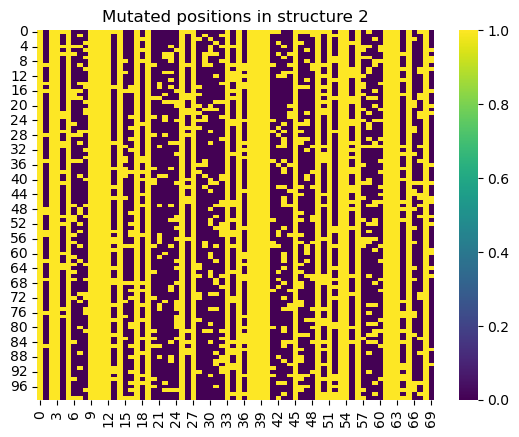

Visualization for DMS Mutation Probability: 0.8


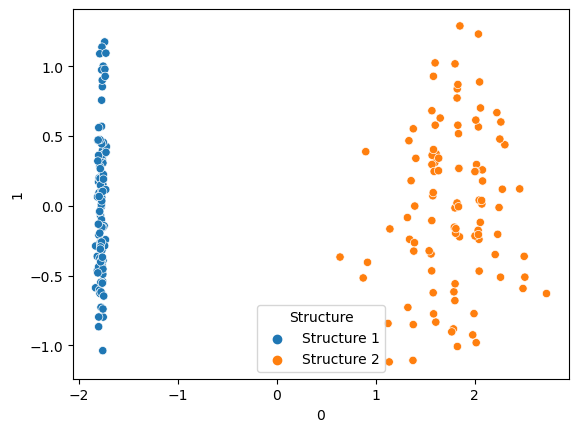

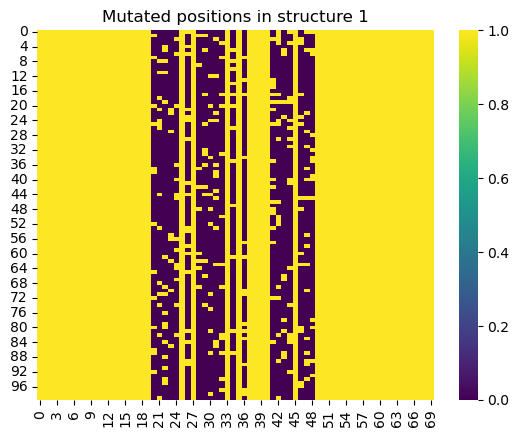

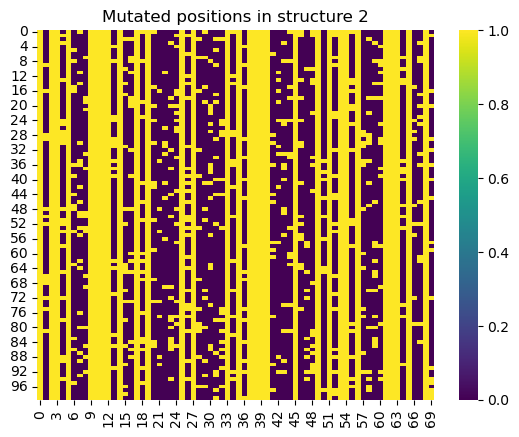

Visualization for DMS Mutation Probability: 0.8500000000000001


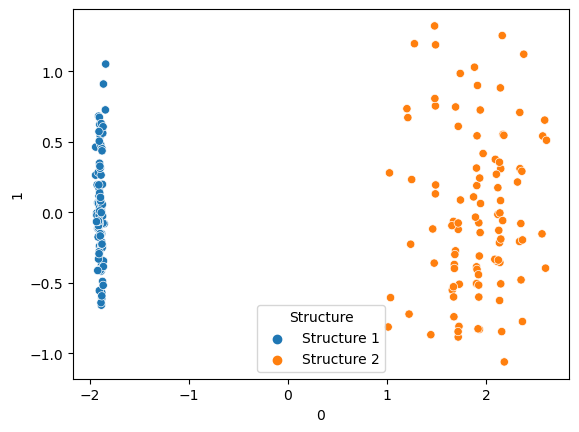

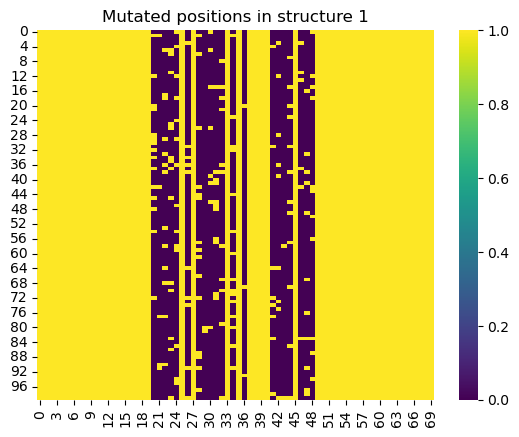

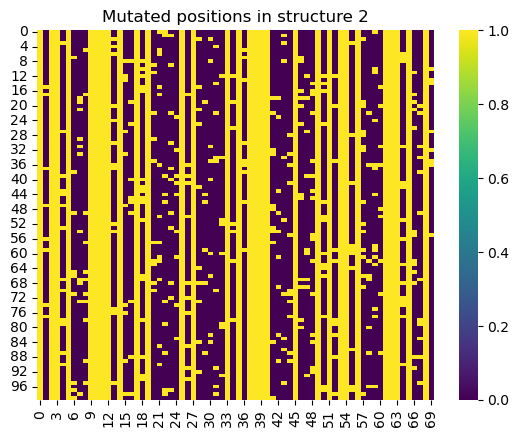

Visualization for DMS Mutation Probability: 0.9000000000000001


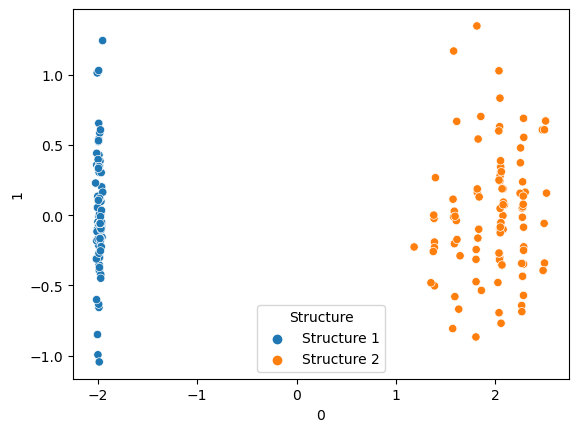

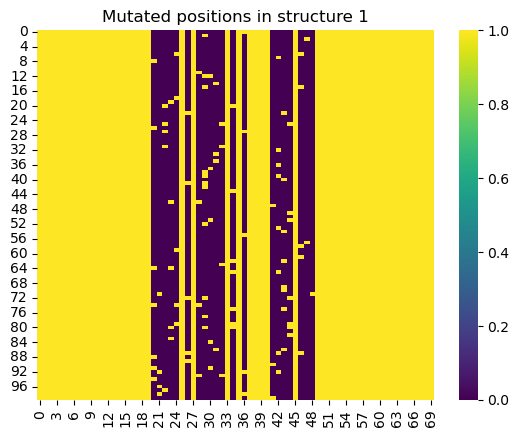

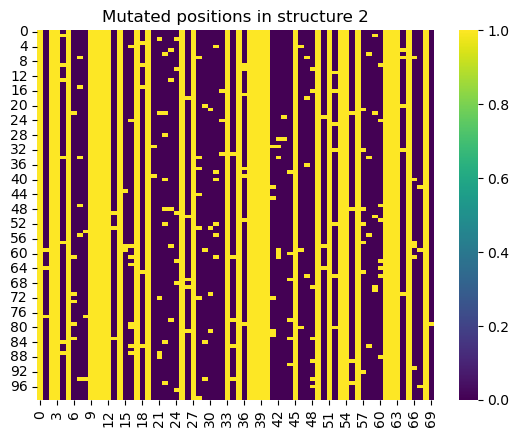

Visualization for DMS Mutation Probability: 0.9500000000000001


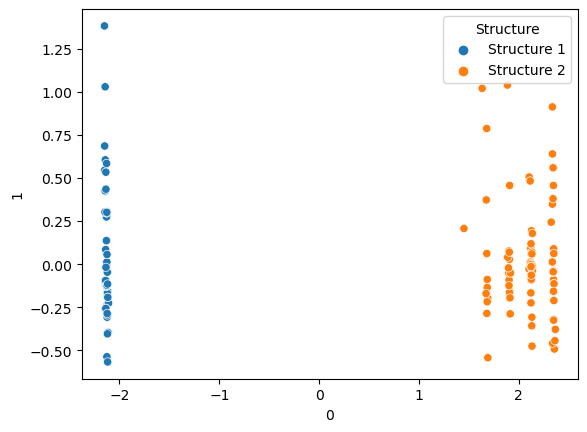

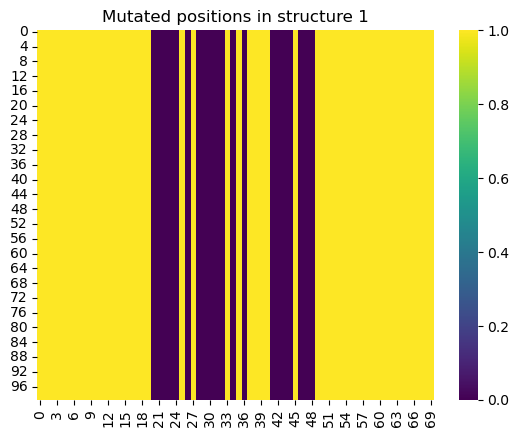

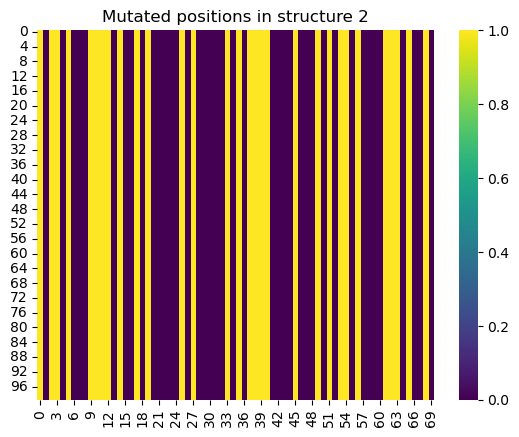

Visualization for DMS Mutation Probability: 1.0


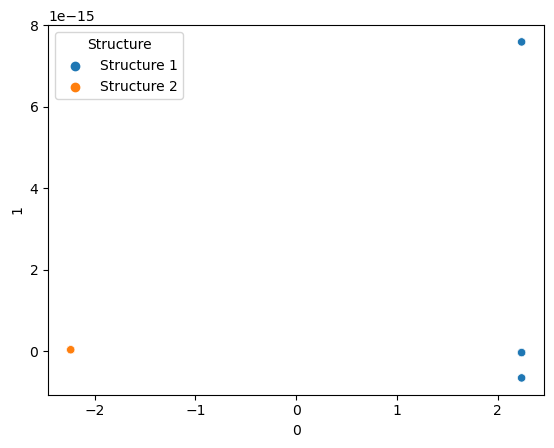

In [40]:
DMS_mutation_probs = np.arange(0.05, 1.05, 0.05)

for prob in DMS_mutation_probs:
    df = simulate_experiment(reference_sequence, [structure1, structure2], DMS_mutation_prob=prob, 
    number_of_reads=100)
    print(f"Visualization for DMS Mutation Probability: {prob}")
    show_alternative_structures(df)


The structures are mostly overlapped at lower probabilities. By the time the probability reaches around 0.2, the structures become very separate.

**[1pt] Question 4b** Knowing what mutation probability we need can help us to experimentally decide what concentration of chemicals we may need in a reaction to accurately distinguish alternative structures. Can you think of any other experimental questions we can answer in this system using simulation experiments such as this?



***Answer:*** Simulation experiments might be able to tell us how different chemicals will impact the rate of mutation when compared with DMS. We also could analyze change in the RNA strand over time when a certain amount of a chemical is added. If we used different RNA sequences, we could also compare how different strands react to a given chemical.